In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
batch_size = 128
epochs = 50

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.1)

Epoch 1/50
352/352 [==============================] - 69s 195ms/step - loss: 1.6485 - accuracy: 0.3958 - val_loss: 1.2859 - val_accuracy: 0.5282
Epoch 2/50
352/352 [==============================] - 68s 193ms/step - loss: 1.2111 - accuracy: 0.5655 - val_loss: 0.9605 - val_accuracy: 0.6640
Epoch 3/50
352/352 [==============================] - 73s 208ms/step - loss: 1.0086 - accuracy: 0.6435 - val_loss: 0.8589 - val_accuracy: 0.6952
Epoch 4/50
352/352 [==============================] - 101s 288ms/step - loss: 0.8924 - accuracy: 0.6857 - val_loss: 0.7665 - val_accuracy: 0.7336
Epoch 5/50
352/352 [==============================] - 69s 197ms/step - loss: 0.8080 - accuracy: 0.7136 - val_loss: 0.7567 - val_accuracy: 0.7392
Epoch 6/50
352/352 [==============================] - 69s 197ms/step - loss: 0.7429 - accuracy: 0.7398 - val_loss: 0.6749 - val_accuracy: 0.7666
Epoch 7/50
352/352 [==============================] - 71s 202ms/step - loss: 0.6849 - accuracy: 0.7584 - val_loss: 0.7045 - val_a

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.7982190847396851
Test accuracy: 0.7968000173568726


In [6]:
# Optimize the model
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
          steps_per_epoch=len(x_train) // batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
          

Epoch 1/50
390/390 [==============================] - 97s 247ms/step - loss: 0.9107 - accuracy: 0.6928 - val_loss: 0.6933 - val_accuracy: 0.7650
Epoch 2/50
390/390 [==============================] - 100s 257ms/step - loss: 0.8106 - accuracy: 0.7224 - val_loss: 0.6537 - val_accuracy: 0.7749
Epoch 3/50
390/390 [==============================] - 96s 246ms/step - loss: 0.7845 - accuracy: 0.7299 - val_loss: 0.6504 - val_accuracy: 0.7822
Epoch 4/50
390/390 [==============================] - 93s 237ms/step - loss: 0.7672 - accuracy: 0.7350 - val_loss: 0.6664 - val_accuracy: 0.7761
Epoch 5/50
390/390 [==============================] - 96s 246ms/step - loss: 0.7436 - accuracy: 0.7443 - val_loss: 0.6713 - val_accuracy: 0.7691
Epoch 6/50
390/390 [==============================] - 95s 242ms/step - loss: 0.7276 - accuracy: 0.7493 - val_loss: 0.6087 - val_accuracy: 0.7958
Epoch 7/50
390/390 [==============================] - 93s 238ms/step - loss: 0.7221 - accuracy: 0.7492 - val_loss: 0.6521 - val_a

In [7]:
# Evaluate the model again
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.5430349111557007
Test accuracy: 0.8235999941825867


In [8]:
# Save model
model.save('cifar10_cnn.keras')

1/1 [==============================] - 0s 99ms/step
The model predicted the image as: ship


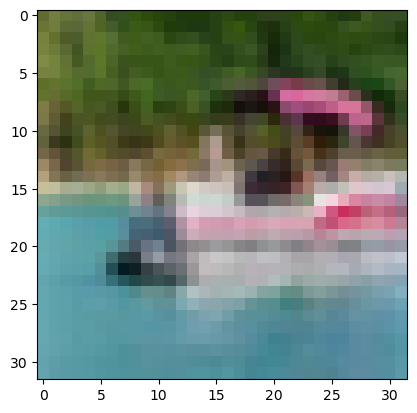

In [9]:
# Choose image from testing set and predict the label
import numpy as np
import matplotlib.pyplot as plt

# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Choose a random image from the test set
index = np.random.randint(0, x_test.shape[0])
img = x_test[index]

# Display the image
plt.imshow(img)

# Add a dimension to the image so that it can be passed to the model
img = np.expand_dims(img, axis=0)

# Get the model prediction
predicted_label = model.predict(img)
predicted_label = labels[np.argmax(predicted_label)]
print(f'The model predicted the image as: {predicted_label}')